In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [6]:
df = pd.read_csv('dataset_reformate.csv')
df['date'] = pd.to_datetime(df['date'])
df[['nombre_total', 'entree_mensuelle']] = df[['nombre_total', 'entree_mensuelle']].astype(int)
df

,pays,date,nombre_total,entree_mensuelle
0,Albanie,2014-02-01,1333,16
1,Allemagne,2014-02-01,306716,445
2,Andorre,2014-02-01,23,0
3,Autriche,2014-02-01,41225,-37
4,Bélarus,2014-02-01,1143,39
...,...,...,...,...
25795,Total Océanie,2024-10-01,4010,37
25796,Apatride,2024-10-01,1254,6
25797,Sans nationalité,2024-10-01,272,3
25798,Etat inconnu,2024-10-01,1089,2


In [7]:
df_grouped = df.groupby(['pays', 'date']).sum().reset_index()
df_grouped

,pays,date,nombre_total,entree_mensuelle
0,Afghanistan,2014-02-01,2437,43
1,Afghanistan,2014-03-01,2475,38
2,Afghanistan,2014-04-01,2496,21
3,Afghanistan,2014-05-01,2535,39
4,Afghanistan,2014-06-01,2567,32
...,...,...,...,...
25795,Zimbabwe,2024-06-01,251,-4
25796,Zimbabwe,2024-07-01,250,-1
25797,Zimbabwe,2024-08-01,249,-1
25798,Zimbabwe,2024-09-01,243,-6


In [8]:
fig = px.line(df_grouped, x='date', y='entree_mensuelle', color='pays', title='Nombre total de migrants par pays')
fig.show()

In [70]:
data = pd.read_csv('dataset_reformate.csv')

# Afficher les premières lignes et les informations générales
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25800 entries, 0 to 25799
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pays              25800 non-null  object 
 1   date              25800 non-null  object 
 2   nombre_total      25800 non-null  int64  
 3   entree_mensuelle  25800 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 806.4+ KB


(None,
         pays        date  nombre_total  entree_mensuelle
 0    Albanie  2014-02-01          1333              16.0
 1  Allemagne  2014-02-01        306716             445.0
 2    Andorre  2014-02-01            23               0.0
 3   Autriche  2014-02-01         41225             -37.0
 4    Bélarus  2014-02-01          1143              39.0)

In [71]:
# Filtrer les données pour l'Allemagne
data['date'] = pd.to_datetime(data['date'])  # Conversion en datetime
germany_data = data[data['pays'] == 'Allemagne'].sort_values(by='date')

# Vérifier les premières lignes pour l'Allemagne
germany_data_info = germany_data.info()
germany_data_head = germany_data.head()

germany_data_info, germany_data_head

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 1 to 25601
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pays              129 non-null    object        
 1   date              129 non-null    datetime64[ns]
 2   nombre_total      129 non-null    int64         
 3   entree_mensuelle  129 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.0+ KB


(None,
           pays       date  nombre_total  entree_mensuelle
 1    Allemagne 2014-02-01        306716             445.0
 201  Allemagne 2014-03-01        306689             -27.0
 401  Allemagne 2014-04-01        306016            -673.0
 601  Allemagne 2014-05-01        306817             801.0
 801  Allemagne 2014-06-01        307436             619.0)

In [72]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Paramètres de séquences temporelles
sequence_length = 12  # Utiliser les 12 derniers mois pour prédire le suivant

# Extraire la variable cible
values = germany_data['entree_mensuelle'].values.reshape(-1, 1)

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_values = scaler.fit_transform(values)

# Créer les séquences temporelles
X, y = [], []
for i in range(len(normalized_values) - sequence_length):
    X.append(normalized_values[i:i + sequence_length])
    y.append(normalized_values[i + sequence_length])

X, y = np.array(X), np.array(y)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Formes des ensembles
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((93, 12, 1), (24, 12, 1), (93, 1), (24, 1))

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Définir le modèle LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Résultat de l'entraînement
history.history

Epoch 1/50


c:\HES-SO\TSM-AnSeqDa\TSM-AnSeqDa\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.1779 - val_loss: 0.1510
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1340 - val_loss: 0.1121
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0882 - val_loss: 0.0766
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0490 - val_loss: 0.0617
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0317 - val_loss: 0.0846
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0338 - val_loss: 0.0714
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0287 - val_loss: 0.0621
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0279 - val_loss: 0.0614
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0289 - val_loss: 0.0618
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0287 - val_loss: 0.0644
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0251 - val_loss: 0.0672
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0315 - val_loss: 0.0646
Epoch 13/50


{'loss': [0.17327533662319183,
  0.12922991812229156,
  0.08495187014341354,
  0.04447852447628975,
  0.032095011323690414,
  0.03489909693598747,
  0.028332671150565147,
  0.02889782004058361,
  0.029180049896240234,
  0.02784230187535286,
  0.02825169637799263,
  0.027176301926374435,
  0.026649335399270058,
  0.02680952660739422,
  0.026744604110717773,
  0.026356320828199387,
  0.026000048965215683,
  0.025832142680883408,
  0.025653474032878876,
  0.025355542078614235,
  0.025237325578927994,
  0.024901624768972397,
  0.02454393543303013,
  0.02425876446068287,
  0.024054745212197304,
  0.023523347452282906,
  0.023940498009324074,
  0.02542971447110176,
  0.024270301684737206,
  0.022398533299565315,
  0.02198769524693489,
  0.021549424156546593,
  0.02157142572104931,
  0.020642226561903954,
  0.02058066986501217,
  0.020795563235878944,
  0.021640868857502937,
  0.01843433268368244,
  0.019763503223657608,
  0.018861550837755203,
  0.018149275332689285,
  0.017439525574445724,


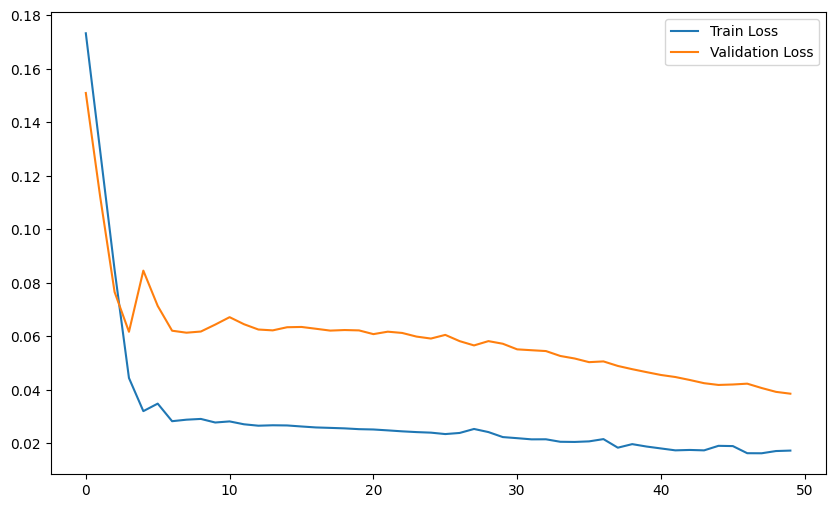

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


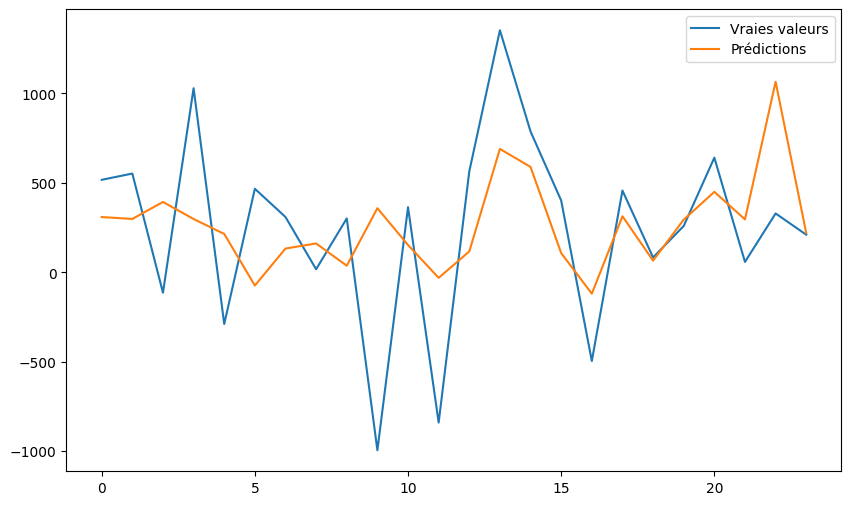

In [75]:
# Prédictions
y_pred = model.predict(X_test)

# Denormaliser les prédictions et les valeurs réelles
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Vraies valeurs')
plt.plot(y_pred, label='Prédictions')
plt.legend()
plt.show()


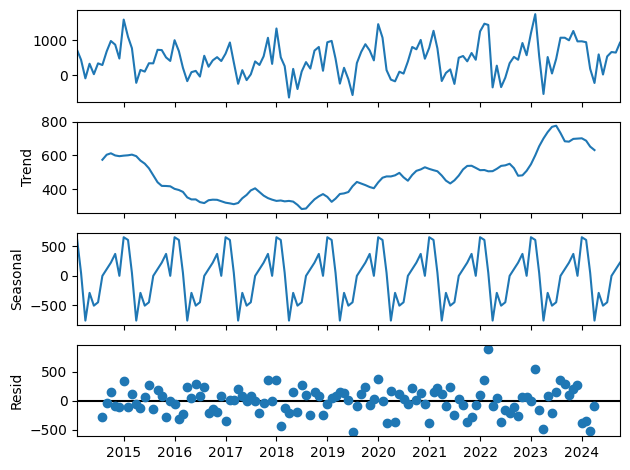

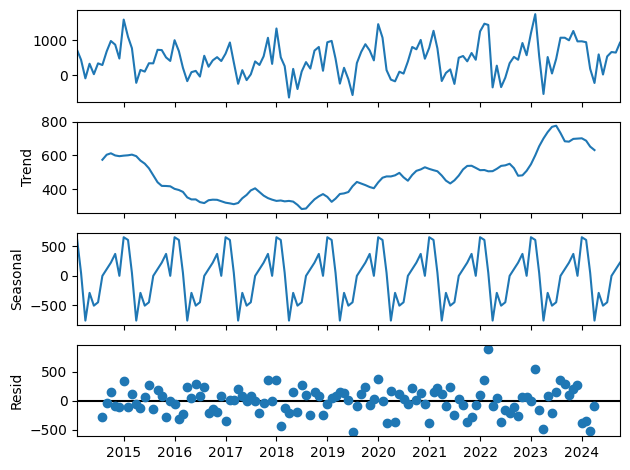

In [21]:
df_grouped = df.groupby(['pays', 'date']).sum().reset_index()

# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

df_grouped = df_grouped[df_grouped['pays'] == 'France']

df_grouped = df_grouped.set_index('date')
df_grouped = df_grouped[['entree_mensuelle']]

result = seasonal_decompose(df_grouped, model='additive', period=12)
result.plot()

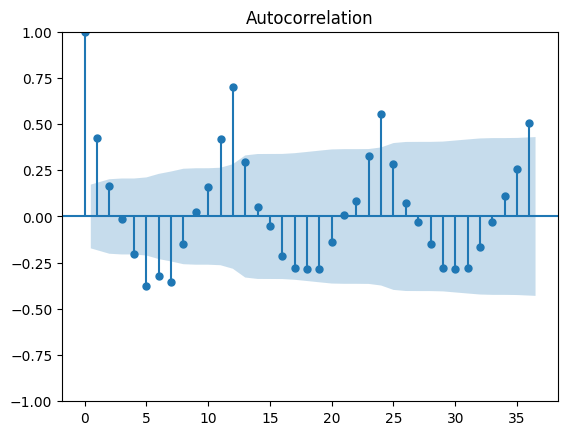

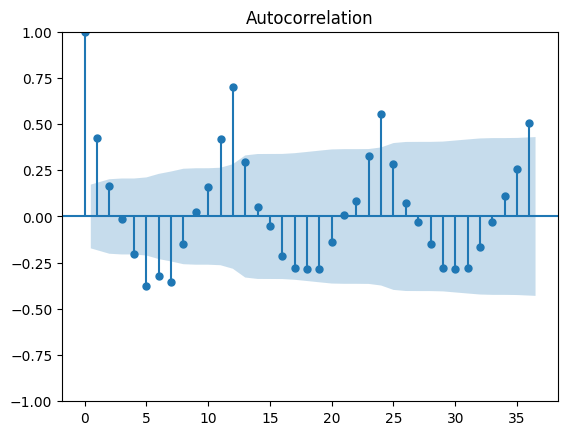

In [22]:
# Auto Correlation
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_grouped['entree_mensuelle'], lags=36)

In [29]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_grouped['entree_mensuelle'], order=(1, 1, 1), freq='M')
model_fit = model.fit()
model_fit.summary()

# Prédictions
forecast = model_fit.forecast(steps=12)
forecast

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['entree_mensuelle'], label='Données réelles')
plt.plot(forecast, label='Prédictions')
plt.legend()
plt.show()

c:\HES-SO\TSM-AnSeqDa\TSM-AnSeqDa\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



ValueError: Lengths must match to compare